### Top 10 Destinations of LA Out Migrators

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [52]:
outmigrators = pd.read_csv('ipums_clean.csv')

In [53]:
outmigrators.MET2013.value_counts()[:10].index

Index(['Riverside-San Bernardino-Ontario, CA', 'San Diego-Carlsbad, CA',
       'San Francisco-Oakland-Hayward, CA', 'Bakersfield, CA',
       'Las Vegas-Henderson-Paradise, NV', 'Oxnard-Thousand Oaks-Ventura, CA',
       'Phoenix-Mesa-Scottsdale, AZ',
       'Sacramento--Roseville--Arden-Arcade, CA',
       'Dallas-Fort Worth-Arlington, TX',
       'New York-Newark-Jersey City, NY-NJ-PA'],
      dtype='object')

In [54]:
dest_abbrev = {'Riverside-San Bernardino-Ontario, CA':'Riverside/SB/Ontario, CA', 
               'San Diego-Carlsbad, CA': 'San Diego-Carlsbad, CA',
               'San Francisco-Oakland-Hayward, CA':'SF/Oakland, CA', 
               'Bakersfield, CA':'Bakersfield, CA',
               'Las Vegas-Henderson-Paradise, NV':'Las Vegas, NV', 
               'Oxnard-Thousand Oaks-Ventura, CA':'Oxnard/Ventura/1000 Oaks, CA',
               'Phoenix-Mesa-Scottsdale, AZ':'Phoenix/Scottsdale, AZ',
               'Sacramento--Roseville--Arden-Arcade, CA': 'Sacramento, CA',
               'Dallas-Fort Worth-Arlington, TX':'Dallas/FW/Arlington, TX',
               'New York-Newark-Jersey City, NY-NJ-PA':'NY/Newark/Jersey City, NY-NJ-PA'}

In [55]:
outmigrators.MET2013 = outmigrators.MET2013.map(dest_abbrev)

In [56]:
top10_dest = outmigrators.MET2013.value_counts()[:10].index
top10_dest

Index(['Riverside/SB/Ontario, CA', 'San Diego-Carlsbad, CA', 'SF/Oakland, CA',
       'Bakersfield, CA', 'Las Vegas, NV', 'Oxnard/Ventura/1000 Oaks, CA',
       'Phoenix/Scottsdale, AZ', 'Sacramento, CA', 'Dallas/FW/Arlington, TX',
       'NY/Newark/Jersey City, NY-NJ-PA'],
      dtype='object')

In [57]:
destination = pd.DataFrame()
for year in range(2006, 2018):
    df = outmigrators[outmigrators.YEAR == year]
    counts = {}
    
    for dest in top10_dest:
        count = df.PERWT[df.MET2013 == dest].sum()
        counts[dest] = count
        
    dest_df = pd.DataFrame.from_dict(counts, orient='index')
    dest_df = dest_df.reset_index().rename({'index':'Destination', 0:'Count'}, axis=1)
    dest_df['Year'] = np.full(len(dest_df), year)
    
    destination = pd.concat([destination, dest_df])

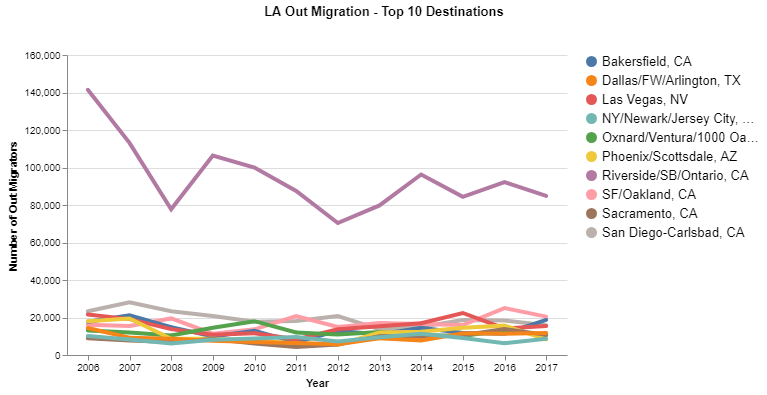

In [58]:
#Plotting top 7 via Altair
title=alt.TitleParams(text='LA Out Migration - Top 10 Destinations', offset=30, anchor='middle')

top10 = alt.Chart(destination).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            title='Year', 
            axis=alt.Axis(grid=False)), 
    y=alt.Y('Count', 
            title='Number of Out Migrators'), 
    color=alt.Color('Destination', 
                    title=None
)).properties(width=500, 
              title=title,
              background='white'
).configure_legend(labelFontSize=13, 
                   symbolStrokeWidth=5.5, 
                   symbolSize=30
).configure_view(strokeWidth=0)

top10

---

Excluding Riverside/SB:

In [59]:
destination_no_riv_sb = pd.DataFrame()
for year in range(2006, 2018):
    df = outmigrators[outmigrators.YEAR == year]
    counts = {}
    
    for dest in top10_dest[1:]:  #Excluding Riverside/SB
        count = df.PERWT[df.MET2013 == dest].sum()
        counts[dest] = count
        
    dest_df = pd.DataFrame.from_dict(counts, orient='index')
    dest_df = dest_df.reset_index().rename({'index':'Destination', 0:'Count'}, axis=1)
    dest_df['Year'] = np.full(len(dest_df), year)
    
    destination_no_riv_sb = pd.concat([destination_no_riv_sb, dest_df])

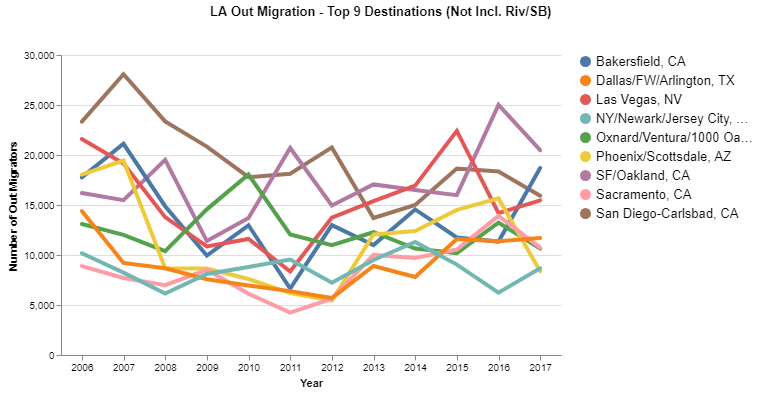

In [60]:
#Plotting via Altair
title=alt.TitleParams(text='LA Out Migration - Top 9 Destinations (Not Incl. Riv/SB)', offset=30, anchor='middle')

no_rv_sb = alt.Chart(destination_no_riv_sb).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            title='Year', 
            axis=alt.Axis(grid=False)), 
    y=alt.Y('Count', 
            title='Number of Out Migrators'), 
    color=alt.Color('Destination', 
                    title=None
)).properties(width=500, 
              title=title,
              background='white'
).configure_legend(labelFontSize=13, 
                   symbolStrokeWidth=5.5, 
                   symbolSize=30
).configure_view(strokeWidth=0)

no_rv_sb